In [26]:
import numpy as np
#计算损失函数，求偏导
def linear_loss(X,y,w,b):
    num_train=X.shape[0]
    num_feature=X.shape[1]
    #当前权重y值
    y_hat=np.dot(X,w)+b
    #损失函数
    loss=np.sum((y-y_hat)**2)/num_train
    dw=2*np.dot(X.T,y_hat-y)/num_train
    db=2*np.sum(y_hat-y)/num_train
    return y_hat,loss,dw,db

In [23]:
def initialize_para(dims):
    w=np.zeros((dims,1))
    b=0
    return w,b

In [34]:
def linear_train(X,y,learning_rate,epochs):
    w,b=initialize_para(X.shape[1])
    loss_list=[]
    for i in range(1,epochs):
        y_hat,loss,dw,db=linear_loss(X,y,w,b)
        loss_list.append(loss)
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        if i%1000==0:
            print('epoch %d:loss %f'%(i,loss))
            
        para={'w':w,'b':b}
        grad={'dw':dw,'db':db}
        
    return loss_list,loss,para,grad

In [20]:
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle

diabetes=load_diabetes()
data=diabetes.data
target=diabetes.target

X,y=shuffle(data,target,random_state=13)
X=X.astype(np.float32)

offset=int(X.shape[0]*0.9)
X_train,y_train=X[:offset],y[:offset]
X_test,y_test=X[offset:],y[:offset]
y_train=y_train.reshape((-1,1))
y_test=y_test.reshape((-1,1))

print('X_train=',X_train.shape)
print('X_test=',X_test.shape)
print('y_train=',y_train.shape)
print('y_test=',y_test.shape)

X_train= (397, 10)
X_test= (45, 10)
y_train= (397, 1)
y_test= (397, 1)


In [39]:
loss_list,loss,para,grad=linear_train(X,y,0.00001,1000)

epoch 100:loss 4384356.028970
epoch 200:loss 2919610.057879
epoch 300:loss 2671573.489974
epoch 400:loss 2629571.572759
epoch 500:loss 2622459.068887
epoch 600:loss 2621254.654549
epoch 700:loss 2621050.701915
epoch 800:loss 2621016.165065
epoch 900:loss 2621010.316678


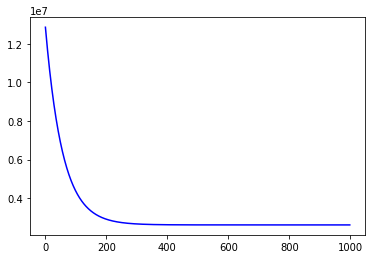

In [43]:
import matplotlib.pyplot as plt
plt.plot(loss_list,color='blue')

In [73]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets import load_diabetes

class lr_model():
    def __init__(self):
        pass
    
    def prepare_data(self):
        diabetes=load_diabetes()
        data=diabetes.data
        target=diabetes.target
        X,y=shuffle(data,target,random_state=13)
        X=X.astype(np.float32)
        y=y.reshape((-1,1))
        data=np.concatenate((X,y),axis=1)
        return data
    
    def initialize_para(self,dims):
        w=np.zeros((dims,1))
        b=0
        return w,b
    
    def linear_loss(self,X,y,w,b):
        num_train=X.shape[0]
        num_feature=X.shape[1]
        #当前权重y值
        y_hat=np.dot(X,w)+b
        #损失函数
        loss=np.sum((y-y_hat)**2)/num_train
        dw=2*np.dot(X.T,y_hat-y)/num_train
        db=2*np.sum(y_hat-y)/num_train
        return y_hat,loss,dw,db
    
    
    def linear_train(self,X,y,learning_rate,epochs):
        w,b=initialize_para(X.shape[1])
        for i in range(1,epochs):
            y_hat,loss,dw,db=linear_loss(X,y,w,b)
            w=w-learning_rate*dw
            b=b-learning_rate*db

            if i%1000==0:
                print('epoch %d:loss %f'%(i,loss))

            para={'w':w,'b':b}
            grad={'dw':dw,'db':db}

        return loss,para,grad
    
    def predict(self,X,para):
        w=para['w']
        b=para['b']
        y_pred=np.dot(X,w)+b
        return y_pred
    
    def linear_cross_validation(self,data,k,randomize=True):
        if randomize:
            shuffle(data)
        slices=[data[i::k] for i in range(k)]
        for i in range(k):
            validation=slices[i]
            train=[data for s in slices if s is not validation for data in s]
            train=np.array(train)
            validation=np.array(validation)
            yield train,validation
            
if __name__=='__main__':
    lr=lr_model()
    data=lr.prepare_data()
    
    for train,validation in lr.linear_cross_validation(data,6):
        X_train=train[:,:10]
        y_train=train[:,-1].reshape((-1,1))
        X_valid=validation[:,:10]
        y_valid=validation[:,-1].reshape((-1,1))
        
        loss5=[]
        loss,para,grad=lr.linear_train(X_train,y_train,0.0001,1000)
        loss5.append(loss)
        score=np.mean(loss5)
        print('6 cross validation score is ',score.round(2))
        y_pred=lr.predict(X_valid,para)
        valid_score=np.sum((y_pred-y_valid)**2)/len(X_valid)
        print('valid score is ',valid_score.round(2))

five cross validation score is  21325.63
valid score is  22248.8
five cross validation score is  21477.31
valid score is  21356.25
five cross validation score is  21655.83
valid score is  20170.26
five cross validation score is  21422.85
valid score is  21516.97
five cross validation score is  21395.85
valid score is  21922.08
five cross validation score is  21410.52
valid score is  21450.85
